In [107]:
# !pip install seaborn

In [108]:
import pandas as pd

In [127]:
df = pd.read_csv('qa_results_RAGAS_evaluated.csv')
df = df.drop_duplicates()
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df = df[df['depth'] != 'depth']

df['depth'] = df['depth'].astype('float')
df['word_count'] = df['word_count'].astype('float')
df['char_count'] = df['char_count'].astype('float')

print(df.shape)

####### RULES
df = df[df['word_count'] >= 50]
df = df[df['word_count'] < 1000]

df = df[df['ragas_fact'] >= 0.5]
df = df[df['SBERT_Similarity'] >= 0.6]


df = df[df['regas_sem_sim'] >= 0.9]
df = df[df['TFIDF_Cosine_Similarity'] >= 0.5]
df = df[df['ragas_bleu']<0.99]


### rogue, cosine sim, SBERT

df['north_star'] = df['ragas_fact']+df['SBERT_Similarity']

df = df.sort_values('north_star', ascending=False)
df = df.head(3000)
df = df[df['north_star'] > 1.11]
print(df.shape)
## north star metric = ragas_fact + SBERT_Similarity

(6600, 20)
(3000, 21)


In [128]:
df[['answer', 'north_star']].head()

,answer,north_star
2868,"The primary focus of the MA degree in interdisciplinary studies at New College is to provide students with the opportunity to combine the study of two or more disciplines, particularly through the lens of interdisciplinary arts and performance. This innovative program is designed to engage students in a comprehensive exploration of various artistic practices and theories, allowing them to develop a unique and personalized academic pathway that reflects their individual interests and creative aspirations.\n\nThe concentration in interdisciplinary arts and performance is particularly noteworthy, as it builds upon decades of experience from New College's undergraduate program in the same field. This concentration encourages students to delve into the study of interdisciplinary art practices, fostering an environment that is inclusive, evolving, and innovative. The curriculum is structured to empower students, enabling them to shape and direct their creative pathways while engaging in collaborative investigations across multiple artistic disciplines.\n\nStudents in this program are not only exposed to theoretical frameworks but also have the opportunity to interact with advanced studies in visual, sonic, and performance arts. This multifaceted approach prepares them to become versatile artists and art scholars, equipping them with the skills necessary to navigate the complexities of the contemporary artistic landscape. The program emphasizes current approaches to aesthetic innovation, ensuring that graduates are well-prepared for the dynamic and ever-changing world of the arts.\n\nMoreover, one of the significant advantages of the MA degree in interdisciplinary studies at New College is the access students have to faculty members who are active practitioners in the field of interdisciplinary inquiry. This mentorship allows students to define their own areas of artistic practice, fostering a personalized educational experience that aligns with their creative goals and professional aspirations.\n\nIn summary, the MA degree in interdisciplinary studies at New College focuses on the integration of multiple disciplines, particularly within the realm of arts and performance. It aims to cultivate a new generation of artists and scholars who are equipped to engage with and contribute to the evolving landscape of interdisciplinary art practices.",1.944
424,"The program described in the context offers a Bachelor of Arts (BA) degree in business with a concentration in tourism. This innovative and transdisciplinary program is designed to equip students with the necessary skills and knowledge to thrive in various professions where business and tourism intersect. \n\nStudents enrolled in this program will engage in a comprehensive curriculum that includes rigorous courses specifically focused on tourism, alongside the core and skill courses mandated for all majors within the W. P. Carey School of Business. This dual approach ensures that graduates not only gain specialized knowledge in tourism but also develop a strong foundation in essential business principles.\n\nThe concentration in tourism emphasizes the importance of understanding effective marketing techniques, which are crucial for promoting tourism and recreation opportunities. Additionally, students learn to interact with a diverse range of businesses that contribute to the tourism sector, thereby enhancing their ability to navigate the complexities of the industry.\n\nBy completing this BA in business with a concentration in tourism, graduates are well-prepared to pursue successful careers in the tourism industry and related fields, leveraging their solid academic background in business to meet the demands of this dynamic sector.",1.939
120,"The BAS program with a concentration in animal biology provides a pathway from an Associate of Applied Science (AAS) degree to a Bachelor of Applied Science (BAS) degree. This program is specifically designed for students

(<Axes: >, 1.306)

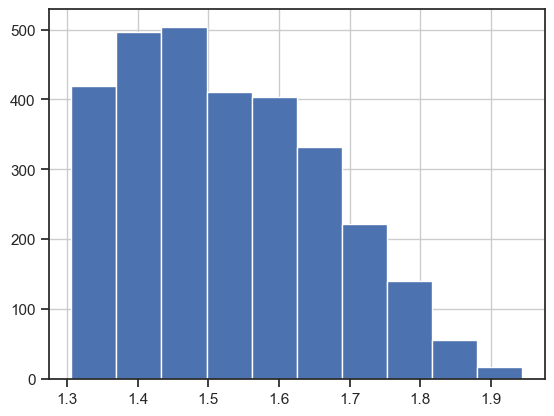

In [129]:
df['north_star'].hist(), df['north_star'].min()

In [130]:
df['depth'].value_counts()

depth
1.0    2614
4.0     164
3.0     126
5.0      63
2.0      33
Name: count, dtype: int64

In [131]:
df.head(1)

,url,depth,title,topic,word_count,char_count,page_text,question,answer,TFIDF_Cosine_Similarity,...,BLEU_Score,SBERT_Similarity,Combined_Similarity_Score,ragas_bleu,ragas_precision_reference,ragas_faith,ragas_fact,regas_sem_sim,regas_rogue,north_star
2868,https://degrees.apps.asu.edu/masters-phd/major/ASU00/ASIDSIPMA/interdisciplinary-studies-interdisciplinary-arts-and-performance-ma,1.0,"Interdisciplinary Studies (Interdisciplinary Arts and Performance), MA",Academic Programs & Courses,155.0,1158.0,"Program Description: The MA degree in interdisciplinary studies is an innovative program in which students can combine the study of two or more disciplines for their program of study. The concentration in interdisciplinary arts and performance enables students to engage the study of interdisciplinary art practices and theories from a perspective developed over decades of New College's undergraduate interdisciplinary arts and performance major.Throughout the curriculum, interdisciplinary arts are outwardly and continually inclusive, expanding, evolving and innovative, empowering students to shape and direct their creative pathways. Students engage in a deeper collaborative investigation of multiple artistic disciplines, interacting with theoretically advanced studies in visual, sonic and performance arts to become versatile artists and art scholars, preparing them for the complex and changing world through current approaches to aesthetic innovation.The program gives students access to faculty members who are active practitioners of interdisciplinary inquiry. Working with the faculty, students may define their own areas of artistic practices.",What is the primary focus of the MA degree in interdisciplinary studies at New College?,"The primary focus of the MA degree in interdisciplinary studies at New College is to provide students with the opportunity to combine the study of two or more disciplines, particularly through the lens of interdisciplinary arts and performance. This innovative program is designed to engage students in a comprehensive exploration of various artistic practices and theories, allowing them to develop a unique and personalized academic pathway that reflects their individual interests and creative aspirations.\n\nThe concentration in interdisciplinary arts and performance is particularly noteworthy, as it builds upon decades of experience from New College's undergraduate program in the same field. This concentration encourages students to delve into the study of interdisciplinary art practices, fostering an environment that is inclusive, evolving, and innovative. The curriculum is structured to empower students, enabling them to shape and direct their creative pathways while engaging in collaborative investigations across multiple artistic disciplines.\n\nStudents in this program are not only exposed to theoretical frameworks but also have the opportunity to interact with advanced studies in visual, sonic, and performance arts. This multifaceted approach prepares them to become versatile artists and art scholars, equipping them with the skills necessary to navigate the complexities of the contemporary artistic landscape. The program emphasizes current approaches to aesthetic innovation, ensuring that graduates are well-prepared for the dynamic and ever-changing world of the arts.\n\nMoreover, one of the significant advantages of the MA degree in interdisciplinary studies at New College is the access students have to faculty members who are active practitioners in the field of interdisciplinary inquiry. This mentorship allows students to define their own areas of artistic practice, fostering a personalized educational experience that aligns with their creative goals and professional aspirations.\n\nIn summary, the MA degree in interdisciplinary studies at New College focuses on the integration of multiple disciplines, particularly within the realm of arts and performance. It aims to cultivate a new generation of a

In [132]:
df.dtypes

url                           object
depth                        float64
title                         object
topic                         object
word_count                   float64
char_count                   float64
page_text                     object
question                      object
answer                        object
TFIDF_Cosine_Similarity      float64
Fuzzy_Similarity             float64
BLEU_Score                   float64
SBERT_Similarity             float64
Combined_Similarity_Score    float64
ragas_bleu                   float64
ragas_precision_reference    float64
ragas_faith                  float64
ragas_fact                   float64
regas_sem_sim                float64
regas_rogue                  float64
north_star                   float64
dtype: object

In [133]:
df.columns

Index(['url', 'depth', 'title', 'topic', 'word_count', 'char_count',
       'page_text', 'question', 'answer', 'TFIDF_Cosine_Similarity',
       'Fuzzy_Similarity', 'BLEU_Score', 'SBERT_Similarity',
       'Combined_Similarity_Score', 'ragas_bleu', 'ragas_precision_reference',
       'ragas_faith', 'ragas_fact', 'regas_sem_sim', 'regas_rogue',
       'north_star'],
      dtype='object')

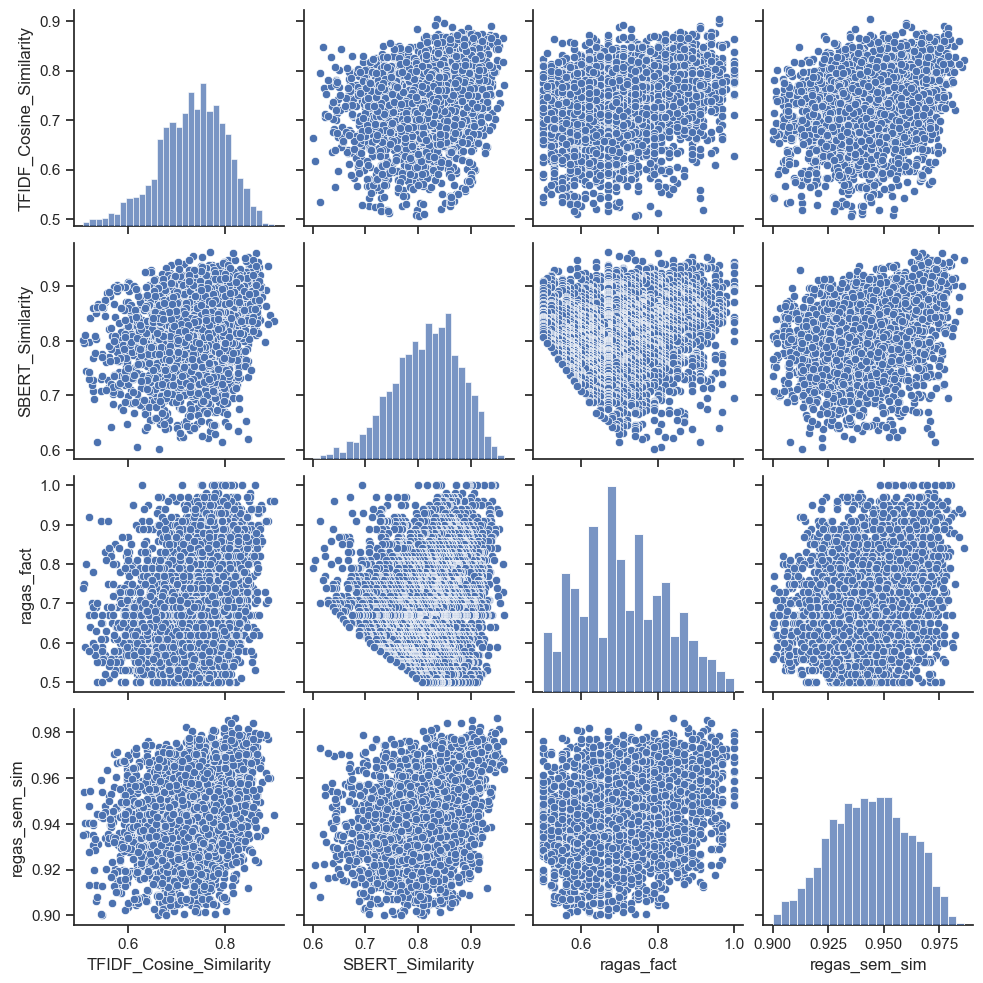

In [134]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df[['TFIDF_Cosine_Similarity', 'SBERT_Similarity',  'ragas_fact', 'regas_sem_sim']])
### regas_rogue is correlated with TFIDF_Cosine_Similarity and, TFIDF_Cosine_Similarity is  less computationally expensive

In [135]:
## there are some fuzzy similarity that is 1 - this is not correct / good
df[df['Fuzzy_Similarity'] > 0.99] ## these were ones that word count was < 50

## there appears to be a correlation between BLEU and rogue scores

## ragas fact has a few 0 values
pd.set_option('display.max_colwidth', None)
df[['page_text','question', 'answer']][df['ragas_fact'] < 0.1]
## these seem to have an answer that is longer than the page_text

,page_text,question,answer


In [136]:
df[df['ragas_bleu']>0.99]

,url,depth,title,topic,word_count,char_count,page_text,question,answer,TFIDF_Cosine_Similarity,...,BLEU_Score,SBERT_Similarity,Combined_Similarity_Score,ragas_bleu,ragas_precision_reference,ragas_faith,ragas_fact,regas_sem_sim,regas_rogue,north_star


In [138]:
df.to_csv('5_cleaned_website_data.csv', index=False)